In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [24]:
def read_net_w(filename):
    # NetworkX ашиглан хоосон граф үүсгэдэг
    g = nx.Graph()

    # Өгөгдсөн нэртэй файлыг нээдэг
    with open(filename) as f:
        # Эхний мөрийг уншиж хаядаг (толгой мөр)
        f.readline()

        # Файлын үлдсэн мөр бүрээр эргэлддэг
        for l in f:
            # Мөрийг комаар хувааж утгуудыг салгадаг
            l = l.split(",")

            # Хоёр зангилааны хооронд ирмэг нэмдэг бөгөөд жин аттрибутыг тохируулдаг
            g.add_edge(l[0], l[1], weight=int(l[2]))

    # Бүх ирмэг нэмэгдсэний дараа графыг буцаадаг
    return g


In [30]:
nx.has_bridges(g)

True

In [31]:
list(nx.bridges(g))

[('JON', 'SAM'),
 ('JON', 'JEOR'),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ'),
 ('TYRION', 'AERYS'),
 ('DAVOS', 'SHIREEN'),
 ('SAM', 'MAESTER_AEMON'),
 ('CERSEI', 'MOUNTAIN'),
 ('TORMUND', 'MANCE'),
 ('HOUND', 'GATINS'),
 ('BRYNDEN', 'MINISA'),
 ('EDMURE', 'HOSTER'),
 ('QYBURN', 'ARTHUR_CHILD'),
 ('NED', 'RICKARD_STARK')]

In [7]:
list(nx.local_bridges(g, with_span=True))

[('JON', 'SAM', inf),
 ('JON', 'JEOR', inf),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ', inf),
 ('TYRION', 'AERYS', inf),
 ('VARYS', 'STANNIS', 3),
 ('ARYA', 'WALDER', 3),
 ('DAVOS', 'SHIREEN', inf),
 ('SAM', 'MAESTER_AEMON', inf),
 ('CERSEI', 'MOUNTAIN', inf),
 ('TORMUND', 'MANCE', inf),
 ('HOUND', 'GATINS', inf),
 ('BRYNDEN', 'MINISA', inf),
 ('EDMURE', 'HOSTER', inf),
 ('QYBURN', 'ARTHUR_CHILD', inf),
 ('NED', 'RICKARD_STARK', inf)]

In [32]:
def node_overlap(g):
    # Граф дахь бүх ирмэгүүдийг давталтаар шалгадаг
    for u, v in g.edges():
        # u зангилааны хөршүүдийн нэгж жагсаалтыг авна
        n_u = set(g.neighbors(u))  # u зангилааны хөршүүдийн сет
        # v зангилааны хөршүүдийн нэгж жагсаалтыг авна
        n_v = set(g.neighbors(v))  # v зангилааны хөршүүдийн сет

        # Хөршүүдийн давхцлын хэмжээг тооцоолох
        # Давхцлын хэмжээг тооцох (хамтарсан хөршүүдийн тоо / нийт хөршүүдийн тоо)
        overlap = len(n_u & n_v) / len(n_u | n_v)  # Neighborhood Overlap

        # Иримэгийн 'overlap' аттрибутыг хадгална
        g[u][v]['overlap'] = overlap

    # Графыг буцаана
    return g


In [9]:
g = node_overlap(g)

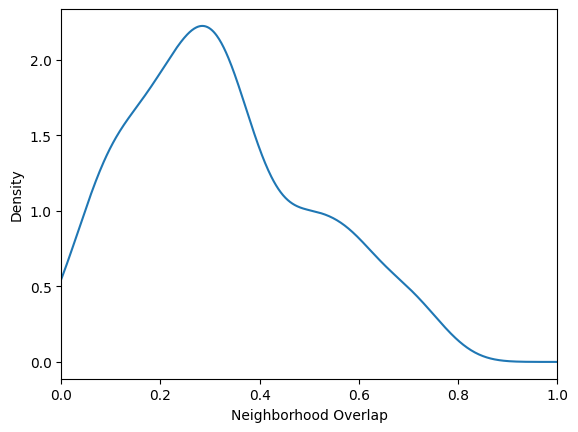

In [33]:
# Графын бүх ирмэгүүдийн 'overlap' аттрибутуудыг авдаг
# Ирмэг бүрийн 'overlap' аттрибутыг гаргаж, жагсаалт болгоно
weights = [e[-1]['overlap'] for e in g.edges(data=True)]

# Жагсаалтыг pandas DataFrame болгон хөрвүүлж, анхны баган дээр нь ядролын нягтаршилын тооцооллыг гаргадаг
# 'weights' жагсаалтыг pandas DataFrame болгон хөрвүүлж, 0-р баганаар ядролын нягтаршилын функцийг (KDE) гаргадаг
pd.DataFrame(weights)[0].plot.kde()

# Хүснэгтэд "Neighborhood Overlap" гэсэн нэртэй тайлбар нэмэх
plt.xlabel("Neighborhood Overlap")

# X тэнхлэгийн хязгаарыг 0-1 хооронд тохируулж өгнө
plt.xlim(0, 1)

# График дүрслэлийг үзүүлнэ
plt.show()


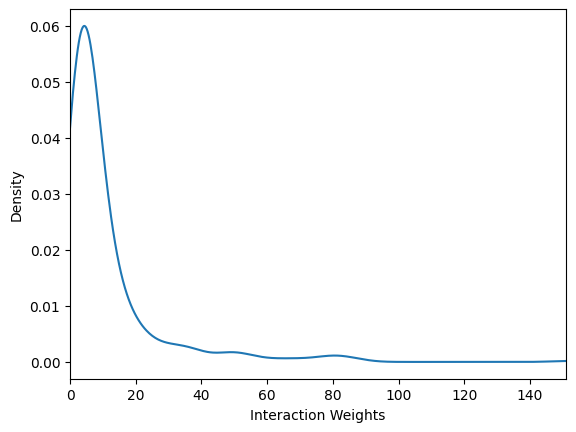

In [34]:
# Графын бүх ирмэгүүдийн 'weight' аттрибутуудыг авдаг
# Ирмэг бүрийн 'weight' аттрибутыг гаргаж, жагсаалт болгоно
weights_got = [d['weight'] for u, v, d in g.edges(data=True)]

# Жагсаалтыг pandas DataFrame болгон хөрвүүлж, анхны баган дээр нь ядролын нягтаршилын тооцооллыг гаргадаг
# 'weights_got' жагсаалтыг pandas DataFrame болгон хөрвүүлж, 0-р баганаар ядролын нягтаршилын функцийг (KDE) гаргадаг
pd.DataFrame(weights_got)[0].plot.kde()

# Хүснэгтэд "Interaction Weights" гэсэн нэртэй тайлбар нэмэх
plt.xlabel("Interaction Weights")

# X тэнхлэгийн хязгаарыг 0-аас хамгийн их 'weight' утга руу тохируулж өгнө
plt.xlim(0, max(weights_got))

# График дүрслэлийг үзүүлнэ
plt.show()


In [35]:
# Эрдös-Рени граф үүсгэдэг
# 1000 зангилаатай, холболтын магадлал 0.001
er = nx.erdos_renyi_graph(1000, 0.001)

# Барбасы-Альбертийн граф үүсгэдэг
# 1000 зангилаатай, шинэ зангилааныг 2 бусад зангилаанд холбох
ba = nx.barabasi_albert_graph(1000, 2)


In [36]:
# Эрдös-Рени графын бүх зангилааны зэрэг (degree) утгуудыг жагсааж авдаг
er_degs = list(dict(er.degree()).values())

# Барбасы-Альбертийн графын бүх зангилааны зэрэг (degree) утгуудыг жагсааж авдаг
ba_degs = list(dict(ba.degree()).values())


In [37]:
# Molloy-Reed хамаарлыг тооцоолох функц
# Энэ нь графын зэрэг (degree)-ийн тархалтын үндсэн дээр Molloy-Reed загварыг ашиглан
# Break down threshold буюу дамжих хязгаарыг тооцоолохын өмнө тооцоолно
def molloy_reed(degrees):
    # molloy_reed функц нь зэрэг (degree)-ийн дундаж утга ашиглан K хэмээх хэмжээг тооцно
    return (np.mean(degrees)*(np.mean(degrees)+1))/np.mean(degrees)

# Breakdown threshold буюу дамжих хязгаарыг тооцоолох функц
# Энэ нь моллои-ридийн хамаарлыг ашиглан графын түвшний хязгаарыг тооцоолно
def breakdown_threshold(degrees):
    # molloy_reed функцээс K хэмжээг авна
    K = molloy_reed(degrees)
    # Хязгаарыг тооцоолох: 1 - (1/(K-1))
    return 1 - (1/(K-1))


In [15]:
molloy_reed(er_degs)

np.float64(2.0140000000000002)

In [16]:
breakdown_threshold(er_degs)

np.float64(0.013806706114398604)

In [17]:
molloy_reed(ba_degs)

np.float64(4.992)

In [18]:
breakdown_threshold(ba_degs)

np.float64(0.7494989979959921)

In [39]:
# Санамсаргүй нэг зангилаа сонгох функц
# Графаас санамсаргүй зангилаа сонгодог
def random_node(g):
    return [np.random.choice(g.nodes())]

# Графаас зангилаа шат дараалалтайгаар устгах ба холболттой бүрдлийг тооцно
# function нь ямар нэгэн функц (жишээ нь, random_node гэх мэт) байх бөгөөд
# гүйцэтгэх үед түүнийг хэрэглэнэ
def dismantle(g, function, **args):
    # Граф дахь бүх зангилаануудын тоо
    total_nodes = g.number_of_nodes()
    removed_nodes = []  # Устгасан зангилаануудын жагсаалт
    components = []  # Холболттой бүрдлийн хэмжээний жагсаалт
    while len(g.nodes()) > 1:
        # Санамсаргүй зангилаа сонгох функц гүйцэтгэнэ
        n = function(g, **args)[0]
        # Зангилааг графаас устгана
        g.remove_node(n)
        # Устгасан зангилаануудын хувь хэмжээг хадгална
        removed_nodes.append((len(removed_nodes)+1)/total_nodes)
        # Холболттой бүрдлийг тооцоолох
        comps = list(nx.connected_components(g))
        g_size = 0
        if len(comps) > 0:
            # Хамгийн том холболттой бүрдлийг сонгоно
            g_size = max([len(c) for c in comps])/total_nodes
        components.append(g_size)
    return removed_nodes, components

# Зангилаануудыг үнэлгээгээр нь сортлох функц
# score функц нь гүйцэтгэх функц бөгөөд зангилаануудын үнэлгээг буцаана
def get_sorted_nodes(g, score, reverse=True):
    # Зангилаануудыг үнэлнэ
    nodes = score(g)
    if isinstance(nodes, dict):
        # Хэрэв функц нь dict буцаасан бол үүнийг тоссон зангилаануудын жагсаалт болгоно
        nodes = [(k, v) for k, v in nodes.items()]
    # Зангилаануудыг үнэлгээний дагуу зогсоолтой эсвэл эсрэг зогсоолтой жагсаана
    srt = sorted(nodes, key=lambda k: k[1], reverse=reverse)
    return [x[0] for x in srt]

# Графикаар графын устгалын үйл явцыг дүрслэх функц
def plot_dismantle(x, y):
    # Дүрслэлд өгөгдлийг тавина
    plt.plot(x, y)
    plt.xlabel("Removed Nodes")  # X тэнхлэг: Устгасан зангилаанууд
    plt.ylabel("Giant Component size")  # Y тэнхлэг: Хамгийн том холболттой бүрдлийн хэмжээ
    plt.show()  # Дүрслэлийг харуулах


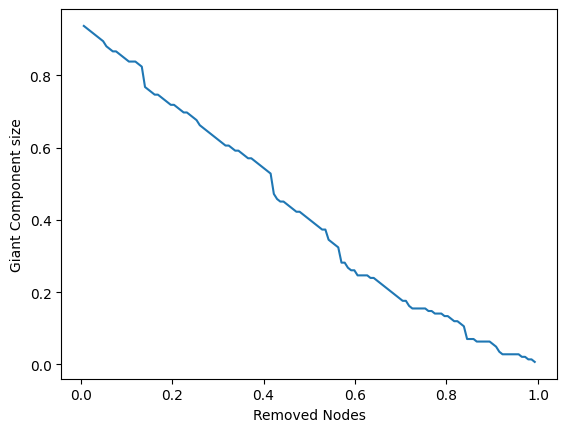

In [40]:
# Графын хуулбарыг гаргадаг
h = g.copy()

# Санамсаргүй зангилаануудыг устгах үйл явцыг гүйцэтгэж, устгасан зангилаанууд ба холболттой бүрдлийг тооцно
rn, comps = dismantle(h, random_node)

# Устгалын үйл явцын үр дүнг графикаар дүрслэнэ
plot_dismantle(rn, comps)


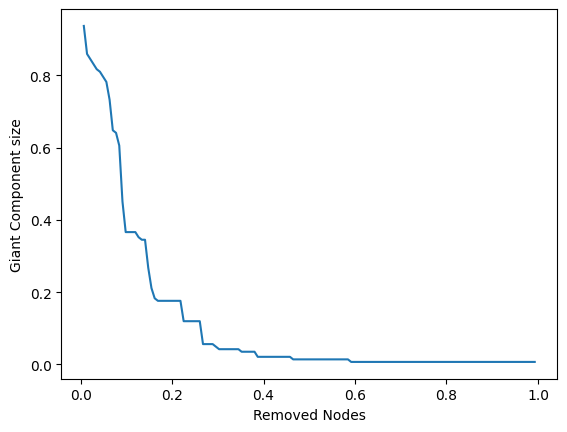

In [41]:
# Графын хуулбарыг гаргадаг
h = g.copy()

# Зангилаануудыг дүүргийн дагуу устгах үйл явцыг гүйцэтгэж, устгасан зангилаанууд ба холболттой бүрдлийг тооцно
# get_sorted_nodes функц нь графын зангилаануудыг 'degree' (зэрэг) -ийн дагуу сортлох болно
rn, comps = dismantle(h, get_sorted_nodes, score=nx.degree)

# Устгалын үйл явцын үр дүнг графикаар дүрслэнэ
plot_dismantle(rn, comps)


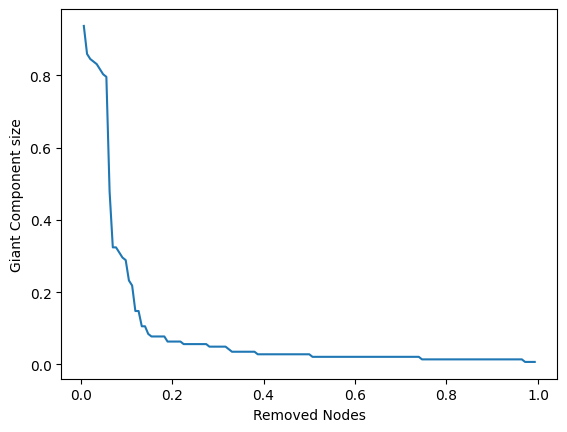

In [42]:
# Графын хуулбарыг гаргадаг
h = g.copy()

# Зангилаануудыг төвлөрлийн төвшний дагуу устгах үйл явцыг гүйцэтгэж, устгасан зангилаанууд ба холболттой бүрдлийг тооцно
# get_sorted_nodes функц нь графын зангилаануудыг 'betweenness_centrality' төвлөрлийн төвшний дагуу сортлох болно
rn, comps = dismantle(h, get_sorted_nodes, score=nx.betweenness_centrality)

# Устгалын үйл явцын үр дүнг графикаар дүрслэнэ
plot_dismantle(rn, comps)


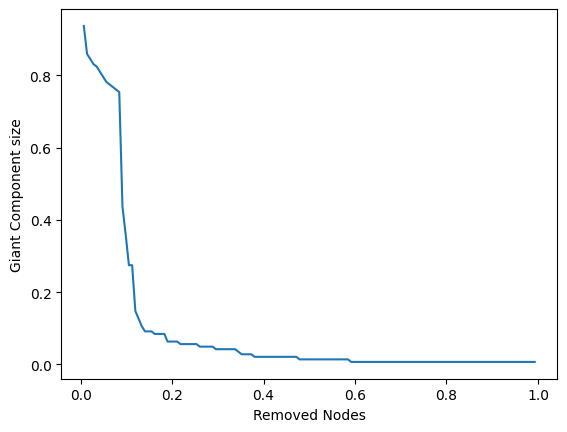

In [43]:
# Графын хуулбарыг гаргадаг
h = g.copy()

# Зангилаануудыг таньж авах төвлөрлийн төвшний (harmonic centrality) дагуу устгах үйл явцыг гүйцэтгэж, устгасан зангилаанууд ба холболттой бүрдлийг тооцно
# get_sorted_nodes функц нь графын зангилаануудыг 'harmonic_centrality' төвлөрлийн төвшний дагуу сортлох болно
rn, comps = dismantle(h, get_sorted_nodes, score=nx.harmonic_centrality)

# Устгалын үйл явцын үр дүнг графикаар дүрслэнэ
plot_dismantle(rn, comps)
